In [62]:
import pandas as pd
import os
import matplotlib.pyplot as plt
%matplotlib inline

In [63]:
print os.environ['DFDATA']

/gws/open/NYCOpenData/nycopendata/data


In [64]:
csvFile =  os.environ['DFDATA']+'/'+'zpd4-gad8/1414245852/zpd4-gad8'
#csvFile = 'https://data.cityofnewyork.us/resource/zpd4-gad8.csv'
print csvFile

/gws/open/NYCOpenData/nycopendata/data/zpd4-gad8/1414245852/zpd4-gad8


In [65]:
mathTest = pd.read_csv(csvFile,sep=',')
mathTest.head()


,Borough,Grade,Year,Category,Number Tested,Mean Scale Score,Level 1 #,Level 1 %,Level 2 #,Level 2 %,Level 3 #,Level 3 %,Level 4 #,Level 4 %,Level 3+4 #,Level 3+4 %
0,BRONX,3,2006,ELL,3754,645,876,23.3%,1037,27.6%,1639,43.7%,202,5.4%,1841,49%
1,BRONX,3,2006,EP,12691,669,1186,9.3%,2220,17.5%,6979,55%,2306,18.2%,9285,73.2%
2,BRONX,3,2007,ELL,3726,659,489,13.1%,908,24.4%,1953,52.4%,376,10.1%,2329,62.5%
3,BRONX,3,2007,EP,12463,678,756,6.1%,1732,13.9%,7043,56.5%,2932,23.5%,9975,80%
4,BRONX,3,2008,ELL,3311,666,205,6.2%,620,18.7%,2242,67.7%,244,7.4%,2486,75.1%


In [66]:
mathTestLy = mathTest.iloc[:,4:6]
mathTestLy.head()

,Number Tested,Mean Scale Score
0,3754,645
1,12691,669
2,3726,659
3,12463,678
4,3311,666


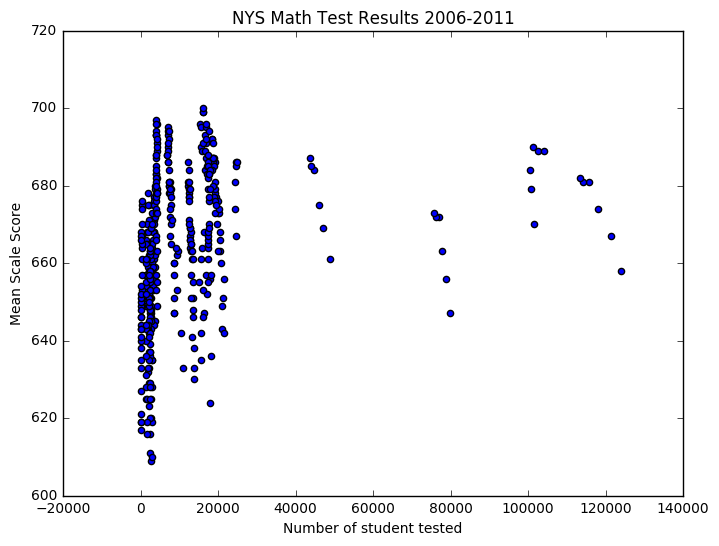

In [67]:
plt.figure(figsize=(8,6))
plt.scatter(mathTestLy['Number Tested'],mathTestLy['Mean Scale Score'])
plt.xlabel('Number of student tested')
plt.ylabel('Mean Scale Score')
plt.title('NYS Math Test Results 2006-2011')

## Figure 1
Source: Department of Education (DOE)

## Extra credit:

In [68]:
#select 8 graders, in English Proficent Schools
grade8andEP = (mathTest['Grade'] == '8') & (mathTest['Category'] == 'EP')

#Keep Borough, Year and Mean Score
mathTestTS = mathTest.loc[grade8andEP,['Year','Borough','Mean Scale Score']]

mathTestTS.head()

,Year,Borough,Mean Scale Score
61,2006,BRONX,630
63,2007,BRONX,638
65,2008,BRONX,648
67,2009,BRONX,661
69,2010,BRONX,663


In [69]:
mathTestTS['Year'] = pd.to_datetime(mathTestTS['Year'],format='%Y')


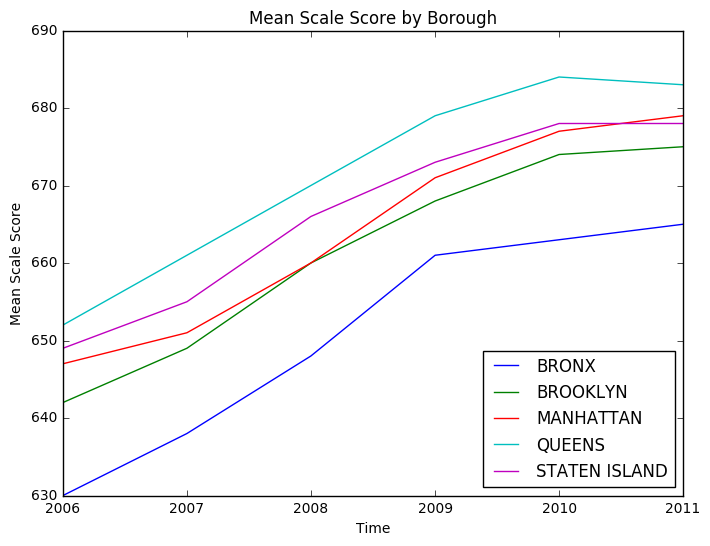

In [70]:
boros = mathTestTS['Borough'].unique()
plt.figure(figsize=(8,6))

for boro in boros:
    plt.plot(mathTestTS['Year'][mathTestTS['Borough'] == boro]
             ,mathTestTS['Mean Scale Score'][mathTestTS['Borough']==boro],
            label = boro)

plt.xlabel('Time')
plt.ylabel('Mean Scale Score')
plt.title('Mean Scale Score by Borough')
plt.legend(loc=4)

## Figure 2: Mean Scale Score by Borough
Source: Department of Education (DOE)